<a href="https://colab.research.google.com/github/andmonteir0/andmonteiro/blob/main/DTHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SURTOS DE DOENÇAS TRANSMITIDAS POR ALIMENTOS NO BRASIL (2019-2021)**


by  Andressa Monteiro (monteiro.data@gmail.com)

[**Meu linkedin**](https://www.linkedin.com/in/monteiroandl/)

In [1]:
#importanto os pacotes
import pandas as pd
from google.colab import drive,files
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import seaborn as sns
#permissão para maniuplação dos arquivos do google drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/projeto_dtha')

Mounted at /content/drive


##**Conhecendo o dataset**

In [2]:
#Criação dos dataframe de acordo com o ano
df_19 = pd.read_csv('SDTABR19.csv', sep=',', encoding='ISO-8859-1')
df_21 = pd.read_csv('SDTABR21.csv', sep=',', encoding='ISO-8859-1')
df_20 = pd.read_csv('SDTABR20.csv', sep=',', encoding='ISO-8859-1')


In [3]:
#junção dos dados em um df só
dados= pd.concat([df_19,df_20,df_21], ignore_index= True)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 95 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_AGRAVO   1609 non-null   object 
 1   DT_NOTIFIC  1609 non-null   int64  
 2   ID_MUNICIP  1609 non-null   int64  
 3   TP_NOT      1609 non-null   int64  
 4   SEM_NOT     1609 non-null   int64  
 5   NU_ANO      1609 non-null   int64  
 6   SG_UF_NOT   1609 non-null   int64  
 7   ID_REGIONA  1427 non-null   float64
 8   ID_UNIDADE  1609 non-null   int64  
 9   DT_SIN_PRI  1609 non-null   int64  
 10  SEM_PRI     1609 non-null   object 
 11  QT_TOTAL_C  1609 non-null   int64  
 12  CS_LOCAL    1602 non-null   float64
 13  SG_UF       1597 non-null   object 
 14  ID_MUNI_RE  1606 non-null   float64
 15  ID_RG_RESI  1606 non-null   float64
 16  ID_PAIS     1607 non-null   float64
 17  DT_DIGITA   0 non-null      float64
 18  DTTRANSUS   1609 non-null   object 
 19  DTTRANSDM   1609 non-null  

In [5]:
dados.shape

(1609, 95)

In [6]:
# Excluindo as colunas desejadas e criando uma novo dataframe chamod "df"
colunas_para_excluir = ['ID_MUNICIP', 'TP_NOT', 'SG_UF_NOT', 'ID_REGIONA',
                         'ID_UNIDADE', 'SEM_NOT', 'ID_PAIS', 'DT_DIGITA',
                         'DTTRANSUS', 'DTTRANSDM', 'DTTRANSRM', 'DTTRANSSM',
                         'DTTRANSRS', 'DTTRANSSE', 'CS_TRANS', 'TP_LOCAL',
                         'NU_ENTR', 'NU_1_M_NU', 'NU_1_4_NU', 'NU_5_9_NU',
                         'NU_10_19_M', 'NU_20_49_N', 'NU_50_M_NU', 'NU_IGRA_NU',
                         'NU_1_F_NU', 'NU1_4_F_NU', 'NU5_9_F_NU', 'NU10_19_N',
                         'NU_20_49_F', 'NU_50_F_NU', 'NU_IG_F_NU', 'NU_1_IGN',
                         'NU_1_4_IGN', 'NU_5_9_IGN', 'NU_10_19IG', 'NU_20_49IG',
                         'NU_50_IGN', 'NU_IG_IGN', 'NU_TOT_IGN', 'NU_INCUB_M',
                         'ST_INCUB_M', 'MAX_INC', 'MAX_ST_INC', 'NU_INC_ME',
                         'ST_INC_ME', 'TP_PRO_PRE', 'ST_IMPRO', 'ST_INAD',
                         'ST_MANIP', 'ST_F_OUTRO', 'DS_F_OUTRO', 'NU_NUM_3',
                         'NU_A_NUM_3', 'ID_RG_RESI', 'SEM_PRI', 'NU_ENT_DOE',
                         'NU_F_TOT', 'ID_AGRAVO', 'SG_UF','NU_F_TOT_N','NU_TO_F_NU',
                         'NU_1_TOT_N','NU_1_4_TOT','NU_5_9_TOT','NU_10_19','NU_20_49',
                         'NU_50_TOT','NU_IGN_NU','NU_NAUSE_P','NU_VOMTO_N','NU_DIARR_N',
                         'NU_CEFAL_N','NU_ABDOM_N','NU_NEURO_N','NU_OUTRO_N','NU_FEBRE_N']


df= dados.drop(columns=colunas_para_excluir)


In [7]:
# Renomeando as colunas
df.rename(columns={
    'DT_NOTIFIC': 'dt_notif',
    'NU_ANO': 'ano',
    'DT_SIN_PRI': 'dt_sint',
    'QT_TOTAL_C': 'qt_expostos',
    'CS_LOCAL': 'local_surto',
    'ID_MUNI_RE': 'cod_muni',
    'DT_INVEST': 'dt_invest',
    'TP_INDIRET': 'veiculo_transmissao',
    'NU_TOT': 'qt_doentes',
    'NU_TOT_HOS': 'qt_hosp',
    'NU_OBITO': 'qt_obito',
    'ST_A_CLINI': 'amostra_clinica',
    'ST_ALIMEN': 'amostra_alimento',
    'AGENTE_ETI': 'agente_et1',
    'AGENTE_ET0': 'agente_et2',
    'AGENTE_ET1': 'agente_et3',
    'ALIMENTO_C': 'alimento_causador',
    'CRITERIO': 'criterio',
    'DT_ENCERRA': 'dt_encerramento'
}, inplace=True)

In [8]:
df.shape

(1609, 19)

In [9]:
df.head()

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,qt_obito,amostra_clinica,amostra_alimento,agente_et1,agente_et2,agente_et3,alimento_causador,criterio,dt_encerramento
0,20190326,2019,20190326,34,5.0,420530.0,20190326,Alimento/Ãügua,34.0,0.0,0.0,2.0,2.0,Bacillus cereus,NaN,NaN,"Produtos cÃírneos embutidos, obtidos de emulsÃúo",1.0,20190405
1,20190326,2019,20190324,4,1.0,314560.0,20190326,Alimento/Ãügua,4.0,0.0,0.0,2.0,2.0,Ignorado,NaN,NaN,Ignorado,1.0,20190409
2,20190404,2019,20190403,11,11.0,310420.0,20190404,Alimento/Ãügua,11.0,0.0,0.0,2.0,1.0,Ignorado,NaN,NaN,Ignorado,2.0,20190630
3,20190401,2019,20190308,2,1.0,261060.0,20190401,Alimento/Ãügua,2.0,2.0,0.0,1.0,NaN,Ignorado,NaN,NaN,Ãügua,5.0,20190402
4,20190401,2019,20190308,2,1.0,261060.0,20190401,Alimento/Ãügua,2.0,0.0,0.0,2.0,2.0,Ignorado,NaN,NaN,Ãügua,5.0,20190402


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt_notif             1609 non-null   int64  
 1   ano                  1609 non-null   int64  
 2   dt_sint              1609 non-null   int64  
 3   qt_expostos          1609 non-null   int64  
 4   local_surto          1602 non-null   float64
 5   cod_muni             1606 non-null   float64
 6   dt_invest            1609 non-null   int64  
 7   veiculo_transmissao  1608 non-null   object 
 8   qt_doentes           1326 non-null   float64
 9   qt_hosp              1279 non-null   float64
 10  qt_obito             1262 non-null   float64
 11  amostra_clinica      1203 non-null   float64
 12  amostra_alimento     1119 non-null   float64
 13  agente_et1           1609 non-null   object 
 14  agente_et2           25 non-null     object 
 15  agente_et3           4 non-null      o

In [11]:
df.isnull().sum()

dt_notif                  0
ano                       0
dt_sint                   0
qt_expostos               0
local_surto               7
cod_muni                  3
dt_invest                 0
veiculo_transmissao       1
qt_doentes              283
qt_hosp                 330
qt_obito                347
amostra_clinica         406
amostra_alimento        490
agente_et1                0
agente_et2             1584
agente_et3             1605
alimento_causador         1
criterio                 49
dt_encerramento           0
dtype: int64

In [12]:
#Verificado se há espaços em branco "" nas colunas que são do tipo string
espaços_vazios= df.applymap(lambda x: str(x).isspace()).any()

if espaços_vazios.any():
    print("Há espaços em branco nas seguintes colunas:")
    print(espaços_vazios[espaços_vazios].index)

Há espaços em branco nas seguintes colunas:
Index(['dt_encerramento'], dtype='object')


> O dataframe inicial, que abrange dados sobre surtos de doenças transmitidas por alimentos (DTHA) de 2019 a 2021, possui 36 colunas e 838 linhas. É evidente a presença de caracteres especiais, que persistem mesmo após tentativas de modificação do encoding. Adicionalmente, as variáveis não estão devidamente tipadas, apresentando valores nulos/NaN e espaços vazios.



##**Tratamento e Limpeza dos dados**



###Substituindo valores ausentes e decodificando variáveis






In [13]:
#Substituindo os valores ausentes apenas das colunas numéricas, que são as que iniciam com qt
cols_numericas = [col for col in df.columns if col.startswith('qt')]
df[cols_numericas] = df[cols_numericas].fillna(0)

In [14]:
#verificando se a subtituição aconteceu de forma correta
df[cols_numericas].isnull().any()

qt_expostos    False
qt_doentes     False
qt_hosp        False
qt_obito       False
dtype: bool

In [15]:
#verificando os valores únicos das variáveis amostra_clinica, amostra_alimento, local_surto e criterio
variaveis_categoricas = ['amostra_clinica', 'amostra_alimento', 'local_surto', 'criterio']

for var in variaveis_categoricas:
    valores_unicos = df[var].unique()
    print(f'Valores únicos em {var}: {valores_unicos}')

Valores únicos em amostra_clinica: [ 2.  1.  9. nan]
Valores únicos em amostra_alimento: [ 2.  1. nan  9.]
Valores únicos em local_surto: [ 5.  1. 11.  2.  6.  3.  8.  9.  7.  4. 10. nan]
Valores únicos em criterio: [ 1.  2.  5.  3. nan  4.  9.]


In [16]:
#Tratando os valores ausentes por Ignorado e decodificando as variáveis
# Mapeamento para 'amostra_clinica'
amostra_clinica_mapping = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
df['amostra_clinica'] = df['amostra_clinica'].map(amostra_clinica_mapping).fillna('Ignorado')

# Mapeamento para 'amostra_alimento'
amostra_alimento_mapping = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
df['amostra_alimento'] = df['amostra_alimento'].map(amostra_alimento_mapping).fillna('Ignorado')

# Mapeamento para 'local_surto'
local_surto_mapping = {
    1: 'Residência', 2: 'Hospital/Unidade Saúde', 3: 'Creche/Escola',
    4: 'Asilo', 5: 'Outros', 6: 'Restaurantes/Padarias', 7: 'Eventos',
    8: 'Casos dispersos bairro', 9: 'Casos dispersos pelo município',
    10: 'Casos dispersos em mais de um município',
    11: 'Outras Instituições (alojamento, trabalho)',
}
df['local_surto'] = df['local_surto'].map(local_surto_mapping).fillna('Ignorado')

# Mapeamento para 'criterio'
criterio_mapping = {
    1: 'Clínico-Epidemiológico', 2: 'Laboratorial Clínico',
    3: 'Laboratorial Bromatológico', 4: 'Laboratorial Clínico-Bromatológico',
    5: 'Inconclusivo',
}
df['criterio'] = df['criterio'].map(criterio_mapping).fillna('Ignorado')

In [17]:
#verificando os valores únicos das variáveis amostra_clinica, amostra_alimento, local_surto e criterio
variaveis_categoricas = ['amostra_clinica', 'amostra_alimento', 'local_surto', 'criterio']

for var in variaveis_categoricas:
    valores_unicos = df[var].unique()
    print(f'Valores únicos em {var}: {valores_unicos}')

Valores únicos em amostra_clinica: ['Não' 'Sim' 'Ignorado']
Valores únicos em amostra_alimento: ['Não' 'Sim' 'Ignorado']
Valores únicos em local_surto: ['Outros' 'Residência' 'Outras Instituições (alojamento, trabalho)'
 'Hospital/Unidade Saúde' 'Restaurantes/Padarias' 'Creche/Escola'
 'Casos dispersos bairro' 'Casos dispersos pelo município' 'Eventos'
 'Asilo' 'Casos dispersos em mais de um município' 'Ignorado']
Valores únicos em criterio: ['Clínico-Epidemiológico' 'Laboratorial Clínico' 'Inconclusivo'
 'Laboratorial Bromatológico' 'Ignorado'
 'Laboratorial Clínico-Bromatológico']


In [18]:
#Verficando as variáveis que ainda possuem valores null
df.isnull().sum()

dt_notif                  0
ano                       0
dt_sint                   0
qt_expostos               0
local_surto               0
cod_muni                  3
dt_invest                 0
veiculo_transmissao       1
qt_doentes                0
qt_hosp                   0
qt_obito                  0
amostra_clinica           0
amostra_alimento          0
agente_et1                0
agente_et2             1584
agente_et3             1605
alimento_causador         1
criterio                  0
dt_encerramento           0
dtype: int64

In [19]:
#Excluindo o NaN da variável veiculo_transmissao
#No cadastro do SINAN, só é considerado como surto de DTHA se o veículo de transmissão for alimento/água, por isto esta linha será excluída
df.dropna(subset=["veiculo_transmissao"], inplace=True)


In [20]:
#verificando os valores únicos da coluna veiculo_Transmissão
df['veiculo_transmissao'].unique()

array(['Alimento/Ãügua'], dtype=object)

In [21]:
#verificando os valores únicos das colunas agente_et2 e agente_3
agente= ['agente_et2', 'agente_et3']
for var in agente:
    valores_unicos = df[var].unique()
    print(f'Valores únicos em {var}: {valores_unicos}')

Valores únicos em agente_et2: [nan 'Staphylococcus spp' 'Salmonella Typhimurium' 'Klebsiella spp'
 'Coliformes' 'RotavÃ¡rus' 'Staphylococcus aureus' 'Escherichia coli'
 'Clostridium perfringens' 'Shigella spp' 'Enterococcus faecalis'
 'Escherichia coli enteropatogÃ¬nica (EPEC)' 'Staphylococcus haemolyticus'
 'Bacillus cereus']
Valores únicos em agente_et3: [nan 'E' 'P' 'S']


In [22]:
#Como a coluna agente_et3 possui apenas letra,impossibilita a sua utilização
df.drop(columns='agente_et3', inplace= True)

In [23]:
#Substituindo os valores NaN de agente_et2 por "Não se aplica"
df['agente_et2'] = df['agente_et2'].fillna("Não se aplica")

In [24]:
#Verificando a exclusão de "agente_et3" e subsituição dos NaN de "agente_et2"
df.head()

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,qt_obito,amostra_clinica,amostra_alimento,agente_et1,agente_et2,alimento_causador,criterio,dt_encerramento
0,20190326,2019,20190326,34,Outros,420530.0,20190326,Alimento/Ãügua,34.0,0.0,0.0,Não,Não,Bacillus cereus,Não se aplica,"Produtos cÃírneos embutidos, obtidos de emulsÃúo",Clínico-Epidemiológico,20190405
1,20190326,2019,20190324,4,Residência,314560.0,20190326,Alimento/Ãügua,4.0,0.0,0.0,Não,Não,Ignorado,Não se aplica,Ignorado,Clínico-Epidemiológico,20190409
2,20190404,2019,20190403,11,"Outras Instituições (alojamento, trabalho)",310420.0,20190404,Alimento/Ãügua,11.0,0.0,0.0,Não,Sim,Ignorado,Não se aplica,Ignorado,Laboratorial Clínico,20190630
3,20190401,2019,20190308,2,Residência,261060.0,20190401,Alimento/Ãügua,2.0,2.0,0.0,Sim,Ignorado,Ignorado,Não se aplica,Ãügua,Inconclusivo,20190402
4,20190401,2019,20190308,2,Residência,261060.0,20190401,Alimento/Ãügua,2.0,0.0,0.0,Não,Não,Ignorado,Não se aplica,Ãügua,Inconclusivo,20190402


In [25]:
#Substituindo os espaços vazios de dt_encarramento por NaT
df['dt_encerramento'] = pd.to_datetime(df['dt_encerramento'], format='%Y%m%d', errors='coerce')
#imputando uma data fictícia para lidar com os NaT
df['dt_encerramento'] = df['dt_encerramento'].fillna(pd.to_datetime('1900-01-01'))

In [26]:
#Verificando a imputação de valores
df['dt_encerramento'].value_counts().sort_index()

1900-01-01    370
2019-01-04      1
2019-01-08      1
2019-01-09      2
2019-01-10      1
             ... 
2022-03-18      1
2022-03-25      1
2022-03-28      1
2022-05-02      1
2022-05-13      1
Name: dt_encerramento, Length: 575, dtype: int64

In [27]:
#Substituindo os valores NaN da variável cod_muni
df['cod_muni'] = df['cod_muni'].fillna(0)

###Obtendo os estados a partir dos dois primeiros valores do código do município

In [28]:
#Criando um dataframe com sigal e código do estado
estado_codigo = pd.DataFrame({
    'estado': ["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"],
    'codigo_estado': [11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53]
  })

In [29]:
#Criando uma nova coluna a partir dos dois primeiros caracteres da coluna "cod_muni" que diz respeito ao código do estado
df['codigo_estado'] = df['cod_muni'] // 10000

In [30]:
#Fazendo o merge onde codigo_estado em df for igual ao codig_estado do datafreme estado_codigo
df=pd.merge(df, estado_codigo, on='codigo_estado', how='left')
df.head()

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,qt_obito,amostra_clinica,amostra_alimento,agente_et1,agente_et2,alimento_causador,criterio,dt_encerramento,codigo_estado,estado
0,20190326,2019,20190326,34,Outros,420530.0,20190326,Alimento/Ãügua,34.0,0.0,0.0,Não,Não,Bacillus cereus,Não se aplica,"Produtos cÃírneos embutidos, obtidos de emulsÃúo",Clínico-Epidemiológico,2019-04-05,42.0,SC
1,20190326,2019,20190324,4,Residência,314560.0,20190326,Alimento/Ãügua,4.0,0.0,0.0,Não,Não,Ignorado,Não se aplica,Ignorado,Clínico-Epidemiológico,2019-04-09,31.0,MG
2,20190404,2019,20190403,11,"Outras Instituições (alojamento, trabalho)",310420.0,20190404,Alimento/Ãügua,11.0,0.0,0.0,Não,Sim,Ignorado,Não se aplica,Ignorado,Laboratorial Clínico,2019-06-30,31.0,MG
3,20190401,2019,20190308,2,Residência,261060.0,20190401,Alimento/Ãügua,2.0,2.0,0.0,Sim,Ignorado,Ignorado,Não se aplica,Ãügua,Inconclusivo,2019-04-02,26.0,PE
4,20190401,2019,20190308,2,Residência,261060.0,20190401,Alimento/Ãügua,2.0,0.0,0.0,Não,Não,Ignorado,Não se aplica,Ãügua,Inconclusivo,2019-04-02,26.0,PE


In [31]:
#Excluindo a coluna que foi criada no merge
df.drop(columns='codigo_estado', inplace=True)

In [32]:
#Excluindo os valores NaN na nova coluna"estado"(aqueles que não tinham código município)
df['estado'] = df['estado'].fillna('Ignorado')

In [33]:
df.isnull().sum()

dt_notif               0
ano                    0
dt_sint                0
qt_expostos            0
local_surto            0
cod_muni               0
dt_invest              0
veiculo_transmissao    0
qt_doentes             0
qt_hosp                0
qt_obito               0
amostra_clinica        0
amostra_alimento       0
agente_et1             0
agente_et2             0
alimento_causador      0
criterio               0
dt_encerramento        0
estado                 0
dtype: int64

####Transformandoas variáveis para o tipo correto

In [34]:
df['dt_notif'] = pd.to_datetime(df['dt_notif'], format='%Y%m%d')
df['ano'] = df['ano'].astype(str)
df['dt_sint'] = pd.to_datetime(df['dt_sint'], format='%Y%m%d')
df['qt_expostos'] = df['qt_expostos'].astype(int)
df['local_surto'] = df['local_surto'].astype('category')
df['cod_muni'] = df['cod_muni'].astype(int)
df['dt_invest'] = pd.to_datetime(df['dt_invest'], format='%Y%m%d')
df['veiculo_transmissao'] = df['veiculo_transmissao'].astype(str)
df['qt_doentes'] = df['qt_doentes'].astype(int)
df['qt_hosp'] = df['qt_hosp'].astype(int)
df['qt_obito'] = df['qt_obito'].astype(int)
df['amostra_clinica'] = df['amostra_clinica'].astype('category')
df['amostra_alimento'] = df['amostra_alimento'].astype('category')
df['agente_et1'] = df['agente_et1'].astype(str)
df['agente_et2'] = df['agente_et2'].astype(str)
df['alimento_causador'] = df['alimento_causador'].astype(str)
df['criterio'] = df['criterio'].astype('category')

####Corrigindo as strings com caracteres especiais

In [35]:
#Verificando os valores únicos da variável alimento_causador
df['alimento_causador'].value_counts().sort_index()

Alimentos mistos                                       79
AÃºaÃ¡                                                 33
Bebidas alcoÃ³licas                                     1
Bebidas nÃúo alcoÃ³licas                                1
Carne bovina in natura, processados e miÃºdos          17
Carne de ave in natura, processados e miÃºdos          11
Carne suÃ¡na in natura, processados e miÃºdos           6
Cereais, farinÃíceos e produtos a base de cereais       8
Doces e sobremesas                                     39
Frutas, produtos de frutas e similares                 15
Gelados comestÃ¡veis                                    2
HortaliÃºas                                             9
Ignorado                                             1083
Inconsistente                                           3
Leite e derivados                                      35
MÃºltiplos alimentos                                   69
Ovos e produtos Ãá base de ovos                        14
Pescados, frut

In [36]:
#Corrigindo as strings e substituindo os nan por "Ignorando"
alimento_corrigido= {
    'Ãügua': 'Água',
    'AÃºaÃ¡':'Água',
    'Bebidas alcoÃ³licas': 'Bebidas  alcoólicas',
    'Carne bovina in natura, processados e miÃºdos':'Carne bovina in natura, processados e miúdos',
    'Carne de ave in natura, processados e miÃºdos': 'Carne de ave in natura, processados e miúdos',
    'Carne suÃ¡na in natura, processados e miÃºdos':'Carne suína in natura, processados e miúdos',
    'Cereais, farinÃíceos e produtos a base de cereais': 'Cereais, farináceos e produtos à base de cereais',
    'HortaliÃºas': 'Hortaliças',
    'MÃºltiplos alimentos':'Múltiplos alimentos',
    'Ovos e produtos Ãá base de ovos': 'Ovos e produtos à base de ovos',
    'Produtos cÃírneos embutidos, obtidos de emulsÃúo':'Produtos cárneos embutidos, obtidos de emulsão',
    'Gelados comestÃ¡veis': 'Gelados comestíveis',
    'Bebidas nÃúo alcoÃ³licas': 'Bebidas não alcoólicas',
    'ignorado' : 'Ignorado'
}
df['alimento_causador'] = df['alimento_causador'].replace(alimento_corrigido).fillna('Ignorado')
df['alimento_causador'].value_counts()

Ignorado                                            1102
Água                                                 172
Alimentos mistos                                      79
Múltiplos alimentos                                   69
Doces e sobremesas                                    39
Leite e derivados                                     35
Pescados, frutos do mar e processados                 19
Carne bovina in natura, processados e miúdos          17
Frutas, produtos de frutas e similares                15
Ovos e produtos à base de ovos                        14
Carne de ave in natura, processados e miúdos          11
Hortaliças                                             9
Cereais, farináceos e produtos à base de cereais       8
Carne suína in natura, processados e miúdos            6
Inconsistente                                          3
Pessoa a pessoa                                        3
Produtos cárneos embutidos, obtidos de emulsão         3
Gelados comestíveis            

In [37]:
#Verificando os valores distintos da coluna "agente_et1"
df['agente_et1'].value_counts().sort_index()

AdenovÃ¡rus                                     1
Aeromonas caviae                                1
Aeromonas hydrophila                            2
Aeromonas spp                                   2
Aeromonas veronii                               2
AstrovÃ¡rus                                     1
Bacillus cereus                                26
Campylobacter jejuni                            1
Campylobacter spp                               2
Clostridium botulinum                           3
Clostridium perfringens                         5
Clostridium spp                                 2
Coliformes                                     18
Coxsackievirus                                  1
Cryptosporidium spp                             1
Entamoeba                                       1
Enterobacter spp                                2
EnterovÃ¡rus                                    1
Escherichia coli                              101
Escherichia coli entero-hemorrÃígica (EHE       1


In [38]:
#Corrigindo as strings
mapeamento_agentes = {
        'AdenovÃ¡rus': 'Adenovírus',
        'AstrovÃ¡rus':'Astrovírus',
        'EnterovÃ¡rus':'Enterovírus',
        'Escherichia coli enteropatogÃ¬nica (EPEC)': 'Escherichia coli enteropatogênica (EPEC)',
        'Escherichia coli entero-hemorrÃígica (EHE': 'Escherichia coli enterohemorrágica (EHEC)',
        'NorovÃ¡rus': 'Norovírus',
        'RotavÃ¡rus': 'Rotavírus',
        'T. cruzi': 'Trypanosoma cruzi',
        'T. Cruzi': 'Trypanosoma cruzi'
}
df['agente_et1'] = df['agente_et1'].replace(mapeamento_agentes)
df['agente_et1'].value_counts().sort_index()

Adenovírus                                      1
Aeromonas caviae                                1
Aeromonas hydrophila                            2
Aeromonas spp                                   2
Aeromonas veronii                               2
Astrovírus                                      1
Bacillus cereus                                26
Campylobacter jejuni                            1
Campylobacter spp                               2
Clostridium botulinum                           3
Clostridium perfringens                         5
Clostridium spp                                 2
Coliformes                                     18
Coxsackievirus                                  1
Cryptosporidium spp                             1
Entamoeba                                       1
Enterobacter spp                                2
Enterovírus                                     1
Escherichia coli                              101
Escherichia coli enteroagregativa (EAEC)        2


In [39]:
# Remover ponto(.) e a ocorrência de 'spp' de agente_et1
df['agente_et1']= df['agente_et1'].str.rstrip('.')
df['agente_et1']= df['agente_et1'].str.replace('spp','')

In [40]:
#Verificando a substituição das strings da variável "agente_et1"
df['agente_et1'].value_counts().sort_index()

Adenovírus                                      1
Aeromonas                                       2
Aeromonas caviae                                1
Aeromonas hydrophila                            2
Aeromonas veronii                               2
Astrovírus                                      1
Bacillus cereus                                26
Campylobacter                                   2
Campylobacter jejuni                            1
Clostridium                                     2
Clostridium botulinum                           3
Clostridium perfringens                         5
Coliformes                                     18
Coxsackievirus                                  1
Cryptosporidium                                 1
Entamoeba                                       1
Enterobacter                                    2
Enterovírus                                     1
Escherichia coli                              101
Escherichia coli enteroagregativa (EAEC)        2


In [41]:
#Verificando os valores distintos da coluna "agente_et2"
df['agente_et2'].value_counts().sort_index()

Bacillus cereus                                 2
Clostridium perfringens                         1
Coliformes                                      2
Enterococcus faecalis                           1
Escherichia coli                                7
Escherichia coli enteropatogÃ¬nica (EPEC)       1
Klebsiella spp                                  3
Não se aplica                                1583
RotavÃ¡rus                                      1
Salmonella Typhimurium                          1
Shigella spp                                    1
Staphylococcus aureus                           2
Staphylococcus haemolyticus                     1
Staphylococcus spp                              2
Name: agente_et2, dtype: int64

In [42]:
#Corrigindo as strings e removendo a ocorrência de 'spp' de agente_et2
df['agente_et2'] = df['agente_et2'].replace(mapeamento_agentes)
df['agente_et2']= df['agente_et2'].str.replace('spp','')

In [43]:
#Verificando a correção das strings de "agente_et2"
df['agente_et2'].value_counts().sort_index()

Bacillus cereus                                2
Clostridium perfringens                        1
Coliformes                                     2
Enterococcus faecalis                          1
Escherichia coli                               7
Escherichia coli enteropatogênica (EPEC)       1
Klebsiella                                     3
Não se aplica                               1583
Rotavírus                                      1
Salmonella Typhimurium                         1
Shigella                                       1
Staphylococcus                                 2
Staphylococcus aureus                          2
Staphylococcus haemolyticus                    1
Name: agente_et2, dtype: int64

In [44]:
#Verificando os valores únicos de veiculo_transmissao
df.veiculo_transmissao.unique()

array(['Alimento/Ãügua'], dtype=object)

In [45]:
#Consertando as palavras que saíram com encoding errado na variável "veículo_transmissão"
df['veiculo_transmissao'] = df['veiculo_transmissao'].replace({ 'Alimento/Ãügua': 'Alimento/água'})

In [46]:
df.head()

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,qt_obito,amostra_clinica,amostra_alimento,agente_et1,agente_et2,alimento_causador,criterio,dt_encerramento,estado
0,2019-03-26,2019,2019-03-26,34,Outros,420530,2019-03-26,Alimento/água,34,0,0,Não,Não,Bacillus cereus,Não se aplica,"Produtos cárneos embutidos, obtidos de emulsão",Clínico-Epidemiológico,2019-04-05,SC
1,2019-03-26,2019,2019-03-24,4,Residência,314560,2019-03-26,Alimento/água,4,0,0,Não,Não,Ignorado,Não se aplica,Ignorado,Clínico-Epidemiológico,2019-04-09,MG
2,2019-04-04,2019,2019-04-03,11,"Outras Instituições (alojamento, trabalho)",310420,2019-04-04,Alimento/água,11,0,0,Não,Sim,Ignorado,Não se aplica,Ignorado,Laboratorial Clínico,2019-06-30,MG
3,2019-04-01,2019,2019-03-08,2,Residência,261060,2019-04-01,Alimento/água,2,2,0,Sim,Ignorado,Ignorado,Não se aplica,Água,Inconclusivo,2019-04-02,PE
4,2019-04-01,2019,2019-03-08,2,Residência,261060,2019-04-01,Alimento/água,2,0,0,Não,Não,Ignorado,Não se aplica,Água,Inconclusivo,2019-04-02,PE


In [47]:
df.shape

(1608, 19)

###Excluindo linhas de casos que não se encaixam na definição de surto DTHA


In [48]:
#Exclusão dos casos onde o alimento causador é pessoa a pessoa ou é bebida alcoólica
alimento= df[(df['alimento_causador'] =='Pessoa a pessoa')|(df['alimento_causador'] =='Bebidas  alcoólicas')]
df.drop(alimento.index, inplace=True)

In [49]:
#Exclusão dos casos onde o agente causador é responsável pelo botulismo
df = df[df['agente_et1'] != 'Clostridium botulinum']

In [50]:
#Identificação de linhas que há valores menores que 2 para doentes, hospitalizados e óbito
doentes_menor2 = df[(df["qt_doentes"] <2)& (df["qt_hosp"] <2) & (df['qt_obito'] <2)]
doentes_menor2

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,qt_obito,amostra_clinica,amostra_alimento,agente_et1,agente_et2,alimento_causador,criterio,dt_encerramento,estado
10,2019-01-23,2019,2019-01-21,4,Hospital/Unidade Saúde,330455,2019-01-23,Alimento/água,0,0,0,Sim,Sim,Escherichia coli,Não se aplica,Ignorado,Laboratorial Clínico,2019-03-19,RJ
29,2019-11-12,2019,2019-11-12,223,Creche/Escola,260430,2019-11-13,Alimento/água,0,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Inconclusivo,1900-01-01,PE
46,2019-02-19,2019,2019-02-17,3,"Outras Instituições (alojamento, trabalho)",320520,2019-02-19,Alimento/água,0,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Inconclusivo,1900-01-01,ES
56,2019-01-21,2019,2019-01-17,1,Residência,260400,2019-01-21,Alimento/água,1,1,0,Sim,Sim,Escherichia coli,Não se aplica,Água,Laboratorial Bromatológico,2019-01-24,PE
77,2019-04-01,2019,2019-03-16,55,Casos dispersos pelo município,411845,2019-04-10,Alimento/água,0,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Inconclusivo,1900-01-01,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2021-11-17,2021,2021-11-02,122,Casos dispersos pelo município,412402,2021-11-17,Alimento/água,0,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Ignorado,1900-01-01,PR
1580,2021-09-21,2021,2021-09-17,57,Creche/Escola,421725,2021-09-21,Alimento/água,0,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Ignorado,1900-01-01,SC
1585,2021-11-22,2021,2021-11-14,4,Residência,291740,2021-11-22,Alimento/água,0,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Ignorado,1900-01-01,BA
1593,2021-11-19,2021,2021-11-15,85,Hospital/Unidade Saúde,411070,2021-11-19,Alimento/água,0,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Ignorado,1900-01-01,PR


In [51]:
##Exclusão de linhas que há valores menores que 2 para doentes, hospitalizados e óbito
df=df.drop(doentes_menor2.index)

In [52]:
#Exclusão dos casos que os sintomas iniciaram antes de 2019
datas_excluir= df[df['dt_sint'].dt.year < 2019]
datas_excluir

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,qt_obito,amostra_clinica,amostra_alimento,agente_et1,agente_et2,alimento_causador,criterio,dt_encerramento,estado
7,2019-01-08,2019,2018-12-23,8,Residência,260390,2019-01-09,Alimento/água,8,3,0,Não,Sim,Escherichia coli,Não se aplica,Água,Laboratorial Bromatológico,2019-02-28,PE
18,2019-01-10,2019,2018-12-24,13,Residência,330455,2019-01-10,Alimento/água,13,0,0,Ignorado,Ignorado,Ignorado,Não se aplica,Ignorado,Inconclusivo,2019-04-22,RJ
50,2019-03-22,2019,2018-04-21,40,Outros,412550,2019-03-22,Alimento/água,20,0,0,Ignorado,Sim,Ignorado,Não se aplica,Ignorado,Laboratorial Clínico,2019-04-05,PR
183,2019-03-14,2019,2018-03-14,4,Asilo,421010,2019-03-15,Alimento/água,4,0,0,Sim,Ignorado,Ignorado,Não se aplica,Ignorado,Laboratorial Clínico,2019-03-15,SC
323,2019-01-14,2019,2018-11-12,15,Residência,170110,2019-01-14,Alimento/água,13,3,1,Sim,Não,Trypanosoma cruzi,Não se aplica,"Frutas, produtos de frutas e similares",Clínico-Epidemiológico,2019-02-25,TO
381,2019-01-07,2019,2018-12-17,23,Outros,520870,2019-01-07,Alimento/água,7,1,0,Não,Sim,Ignorado,Não se aplica,Ignorado,Inconclusivo,2019-02-10,GO
768,2019-10-02,2019,2016-09-29,4,Residência,315120,2019-10-02,Alimento/água,4,0,0,Não,Sim,Ignorado,Não se aplica,Ignorado,Inconclusivo,2019-11-20,MG


In [53]:
df.drop(datas_excluir.index, inplace=True)

In [54]:
df.shape

(1309, 19)

###Exclusão de linhas duplicadas e overwiew do dataset após a limpeza

In [55]:
#Excluíndo as linhas duplicadas
df= df.drop_duplicates()

In [56]:
df.shape

(1307, 19)

In [57]:
df.head()

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,qt_obito,amostra_clinica,amostra_alimento,agente_et1,agente_et2,alimento_causador,criterio,dt_encerramento,estado
0,2019-03-26,2019,2019-03-26,34,Outros,420530,2019-03-26,Alimento/água,34,0,0,Não,Não,Bacillus cereus,Não se aplica,"Produtos cárneos embutidos, obtidos de emulsão",Clínico-Epidemiológico,2019-04-05,SC
1,2019-03-26,2019,2019-03-24,4,Residência,314560,2019-03-26,Alimento/água,4,0,0,Não,Não,Ignorado,Não se aplica,Ignorado,Clínico-Epidemiológico,2019-04-09,MG
2,2019-04-04,2019,2019-04-03,11,"Outras Instituições (alojamento, trabalho)",310420,2019-04-04,Alimento/água,11,0,0,Não,Sim,Ignorado,Não se aplica,Ignorado,Laboratorial Clínico,2019-06-30,MG
3,2019-04-01,2019,2019-03-08,2,Residência,261060,2019-04-01,Alimento/água,2,2,0,Sim,Ignorado,Ignorado,Não se aplica,Água,Inconclusivo,2019-04-02,PE
4,2019-04-01,2019,2019-03-08,2,Residência,261060,2019-04-01,Alimento/água,2,0,0,Não,Não,Ignorado,Não se aplica,Água,Inconclusivo,2019-04-02,PE


In [58]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qt_expostos,1307.0,30.163734,136.587123,0.0,3.0,7.0,18.0,2900.0
cod_muni,1307.0,305779.548585,93064.491790,110014.0,260545.0,311455.0,353665.0,530010.0
qt_doentes,1307.0,17.056618,34.270966,0.0,3.0,6.0,15.0,448.0
qt_hosp,1307.0,1.910482,8.198557,0.0,0.0,0.0,1.0,126.0
qt_obito,1307.0,0.016832,0.174196,0.0,0.0,0.0,0.0,4.0


In [59]:
#Frequencia absoluta das variáveis strings e categóricas
# Selecionando as colunas de tipo 'category' ou 'str'
colunas = df.select_dtypes(include=['category', 'object']).columns

for coluna in colunas:
    fa = df[coluna].value_counts()
    print(f"Frequência absoluta para {coluna}:\n{fa}\n")

Frequência absoluta para ano:
2019    553
2021    492
2020    262
Name: ano, dtype: int64

Frequência absoluta para local_surto:
Residência                                    495
Restaurantes/Padarias                         193
Outras Instituições (alojamento, trabalho)    141
Creche/Escola                                 119
Outros                                        116
Hospital/Unidade Saúde                        112
Eventos                                        60
Casos dispersos pelo município                 31
Asilo                                          19
Casos dispersos bairro                         18
Ignorado                                        2
Casos dispersos em mais de um município         1
Name: local_surto, dtype: int64

Frequência absoluta para veiculo_transmissao:
Alimento/água    1307
Name: veiculo_transmissao, dtype: int64

Frequência absoluta para amostra_clinica:
Não         631
Sim         531
Ignorado    145
Name: amostra_clinica, dtype: int64

Fr

In [60]:
# #Gerando um arquivo xlsx do df tratado
# df.to_excel('dtha20_21.xlsx', index=False, engine='openpyxl')
# files.download('dtha20_21.xlsx')

##**Outras transformações**


In [61]:
#Perceb-se que em agente_et1 possui linhas " Inconclusivo" e "Inconsitente" , que ao meu entender, dizem a mesma coisa.
df['agente_et1'].value_counts().sort_index()

Adenovírus                                     1
Aeromonas                                      2
Aeromonas caviae                               1
Aeromonas hydrophila                           2
Aeromonas veronii                              2
Astrovírus                                     1
Bacillus cereus                               26
Campylobacter                                  2
Campylobacter jejuni                           1
Clostridium                                    2
Clostridium perfringens                        5
Coliformes                                    17
Coxsackievirus                                 1
Cryptosporidium                                1
Entamoeba                                      1
Enterobacter                                   2
Enterovírus                                    1
Escherichia coli                              96
Escherichia coli enteroagregativa (EAEC)       2
Escherichia coli enterohemorrágica (EHEC)      1
Escherichia coli ent

In [62]:
df['agente_et1'] = df['agente_et1'].replace({ 'Inconsistente': 'Inconclusivo'})

In [63]:
#Adicionando uma coluna de região do país
ne=['MA','PI','CE','RN','PB','PE','AL','SE','BA']
no=['AM','PA','AC','RR','RO','AP','TO']
sl=['PR','SC','RS']
se=['ES','MG','RJ', 'SP']

regiao= []
for estado in df['estado']:
  if estado in ne:
    regiao.append('Nordeste')
  elif estado in no:
    regiao.append('Norte')
  elif estado in sl:
    regiao.append('Sul')
  elif estado in se:
    regiao.append('Sudeste')
  else:
    regiao.append('Centro-Oeste')

df['regiao'] = regiao

In [64]:
#Criando uma coluna nova com o gênero do agente etiológico da coluna [agente_et1]
genero_sp=df['agente_et1'].str.split(" ")
df['genero_ag1'] = genero_sp.str.get(0)

In [65]:
df['genero_ag1'].value_counts().sort_index()

Adenovírus           1
Aeromonas            7
Astrovírus           1
Bacillus            26
Campylobacter        3
Clostridium          7
Coliformes          17
Coxsackievirus       1
Cryptosporidium      1
Entamoeba            1
Enterobacter         2
Enterovírus          1
Escherichia        109
Histamina            1
Ignorado           936
Inconclusivo        47
Klebsiella           5
Listeria             1
Norovírus           25
Plesiomonas          1
Pseudomonas          2
Rotavírus            8
Salmonella          36
Shigella             4
Staphylococcus      28
Toxoplasma           1
Trypanosoma         34
Urbanorum            1
Name: genero_ag1, dtype: int64

In [66]:
#Criando uma coluna nova com o gênero do agente etiológico da coluna [agente_et2]. Apenas para os surtos que possuem um segundo agente
gn_ag2 = []
for agente in df['agente_et2']:
    if agente == 'Não se aplica':
        gn_ag2.append('Não se aplica')
    else:
        genero_sp2 = agente.split(" ")
        genero_a2 = genero_sp2[0]
        gn_ag2.append(genero_a2)

df['genero_ag2'] = gn_ag2
df['genero_ag2'].value_counts().sort_index()

Bacillus             2
Clostridium          1
Coliformes           2
Enterococcus         1
Escherichia          8
Klebsiella           3
Não se aplica     1282
Rotavírus            1
Salmonella           1
Shigella             1
Staphylococcus       5
Name: genero_ag2, dtype: int64

In [67]:
#Criando uma nova coluna que dicotomiza  as colunas a coleta de amostra de alimento e amostra clínica. Logo, as linhas que são "Ignorado" foram transformadas em "Não"
df['dic_alimento_amostra'] = df['amostra_alimento'].replace({'Ignorado':'Não'})
df['dic_clinico_amostra'] = df['amostra_clinica'].replace({'Ignorado':'Não'})

In [68]:
a=df['dic_clinico_amostra'].value_counts().sort_index()
b=df['dic_alimento_amostra'].value_counts().sort_index();
print(a)
print(b)

Não    776
Sim    531
Name: dic_clinico_amostra, dtype: int64
Não    871
Sim    436
Name: dic_alimento_amostra, dtype: int64


In [69]:
# #Criando uma nova coluna que identifica se há dois agentes ou não naquele surto #errado;. Cadê o ignorado ou inconclusivo no ag1
# dois_ag= []
# for agente in df['agente_et2']:
#   if agente == 'Não se aplica':
#     dois_ag.append('Só há um agente')
#   else:
#     dois_ag.append('Há dois agentes etiológicos')
# df['dic_agente'] = dois_ag
# df['dic_agente'].value_counts().sort_index()

In [70]:
#Criando uma nova coluna que identifica se foi coletada alguma amostra, seja ela clínica ou do alimento
amostras = []
for indice, linha in df.iterrows():
    if linha['dic_clinico_amostra'] == 'Não' and linha['dic_alimento_amostra'] == 'Não':
        amostras.append('Não foi coletada amostra')
    else:
        amostras.append('Foi coletada pelo menos uma amostra')
df['dic_amostra'] = amostras
df['dic_amostra'].value_counts().sort_index()

Foi coletada pelo menos uma amostra    758
Não foi coletada amostra               549
Name: dic_amostra, dtype: int64

In [71]:
agente_definido=[]
for agente in df['agente_et1']:
    if agente not in ['Ignorado', 'Inconclusivo']:
        agente_definido.append('Agente identificado')
    else:
        agente_definido.append('Agente desconhecido')
df['ag_ident'] = agente_definido
df['ag_ident'].value_counts().sort_index()

Agente desconhecido    983
Agente identificado    324
Name: ag_ident, dtype: int64

In [72]:
df

,dt_notif,ano,dt_sint,qt_expostos,local_surto,cod_muni,dt_invest,veiculo_transmissao,qt_doentes,qt_hosp,...,criterio,dt_encerramento,estado,regiao,genero_ag1,genero_ag2,dic_alimento_amostra,dic_clinico_amostra,dic_amostra,ag_ident
0,2019-03-26,2019,2019-03-26,34,Outros,420530,2019-03-26,Alimento/água,34,0,...,Clínico-Epidemiológico,2019-04-05,SC,Sul,Bacillus,Não se aplica,Não,Não,Não foi coletada amostra,Agente identificado
1,2019-03-26,2019,2019-03-24,4,Residência,314560,2019-03-26,Alimento/água,4,0,...,Clínico-Epidemiológico,2019-04-09,MG,Sudeste,Ignorado,Não se aplica,Não,Não,Não foi coletada amostra,Agente desconhecido
2,2019-04-04,2019,2019-04-03,11,"Outras Instituições (alojamento, trabalho)",310420,2019-04-04,Alimento/água,11,0,...,Laboratorial Clínico,2019-06-30,MG,Sudeste,Ignorado,Não se aplica,Sim,Não,Foi coletada pelo menos uma amostra,Agente desconhecido
3,2019-04-01,2019,2019-03-08,2,Residência,261060,2019-04-01,Alimento/água,2,2,...,Inconclusivo,2019-04-02,PE,Nordeste,Ignorado,Não se aplica,Não,Sim,Foi coletada pelo menos uma amostra,Agente desconhecido
4,2019-04-01,2019,2019-03-08,2,Residência,261060,2019-04-01,Alimento/água,2,0,...,Inconclusivo,2019-04-02,PE,Nordeste,Ignorado,Não se aplica,Não,Não,Não foi coletada amostra,Agente desconhecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,2021-12-04,2021,2021-12-04,5,Residência,130420,2021-12-04,Alimento/água,5,0,...,Clínico-Epidemiológico,2021-12-04,AM,Norte,Ignorado,Não se aplica,Não,Não,Não foi coletada amostra,Agente desconhecido
1604,2021-09-17,2021,2021-09-14,19,"Outras Instituições (alojamento, trabalho)",312980,2021-09-17,Alimento/água,19,14,...,Clínico-Epidemiológico,2021-09-17,MG,Sudeste,Ignorado,Não se aplica,Não,Sim,Foi coletada pelo menos uma amostra,Agente desconhecido
1605,2021-10-22,2021,2021-10-20,6,Residência,292230,2021-10-22,Alimento/água,6,6,...,Laboratorial Clínico-Bromatológico,2021-12-20,BA,Nordeste,Staphylococcus,Não se aplica,Sim,Não,Foi coletada pelo menos uma amostra,Agente identificado
1606,2021-12-09,2021,2021-12-08,100,"Outras Instituições (alojamento, trabalho)",430910,2021-12-09,Alimento/água,39,0,...,Laboratorial Bromatológico,2022-05-13,RS,Sul,Bacillus,Não se aplica,Sim,Sim,Foi coletada pelo menos uma amostra,Agente identificado


In [73]:
df.shape

(1307, 26)

##**Análise do Dataset**

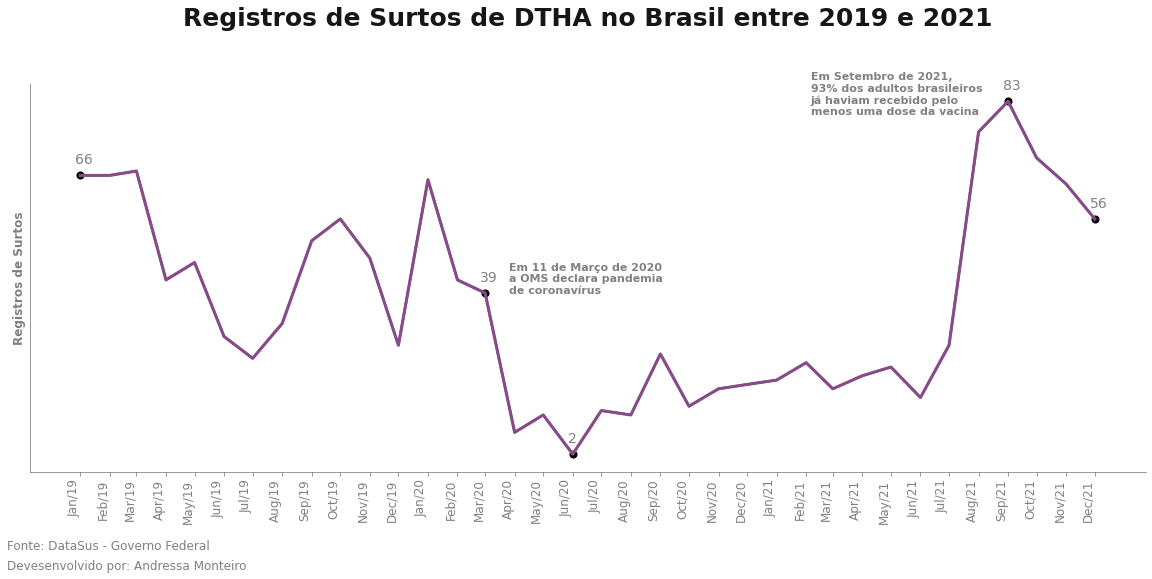

In [74]:
# Criar uma coluna 'mes' com o mês da notificação
df['mes'] = df['dt_notif'].dt.month

# Criar um novo DataFrame agrupando por ano e mês e contando o número de ocorrências
surto_ano_mes = df.groupby(['ano', 'mes']).size().reset_index(name='count')

# Adicionar uma nova coluna 'data' combinando ano e mês para facilitar a ordenação
surto_ano_mes['data'] = pd.to_datetime(surto_ano_mes['ano'].astype(str) + '-' + surto_ano_mes['mes'].astype(str) + '-01')

# Ordenar o DataFrame pela coluna 'data'
surto_ano_mes = surto_ano_mes.sort_values('data')

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(20, 7), dpi=72)

# Remover grid e linhas
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Configurar rótulos do eixo y
ax.set_ylabel('Registros de Surtos', color='gray', fontsize=12, fontweight='bold')

# Definir cor cinza dos valores dos eixos x e y
ax.tick_params(axis='x', colors='gray', labelsize=12)
ax.tick_params(axis='y', colors='gray', labelsize=12)

# Criar o gráfico de linha
ax.plot(surto_ano_mes['data'], surto_ano_mes['count'], linewidth=2.5)

# Exibir o gráfico de linha
ax.plot(surto_ano_mes['data'], surto_ano_mes['count'], linewidth=3, color ='#8a4a88')

meses_anos_destacados = [(1, 2019), (3, 2020),(6,2020), (9, 2021), (12, 2021)]

for i, (ano, surto) in enumerate(zip(surto_ano_mes['data'], surto_ano_mes['count'])):
    if (ano.month, ano.year) in meses_anos_destacados:
        ax.scatter(ano, surto, s=50, color='black')
        ax.annotate(surto,
                    xy=(ano, surto),
                    xytext=(-5,12),
                    textcoords='offset points',
                    color='gray',
                    fontsize=14)


# Configurar rótulos personalizados no eixo x

ax.set_xticks(surto_ano_mes['data'])
ax.set_xticklabels(surto_ano_mes['data'].dt.strftime('%b/%y'), rotation=90, ha='right')
#Títulos e legendas

ax.text(0.5, 1.15, 'Registros de Surtos de DTHA no Brasil entre 2019 e 2021',
        fontsize=25,
        color='#161616',
        fontweight='bold',
        ha='center',
        transform=ax.transAxes)
ax.text(0.43, 0.46,'Em 11 de Março de 2020\n''a OMS declara pandemia\n''de coronavírus',
        fontsize=11,
        fontweight='bold',
        color='gray',
        transform=ax.transAxes)
ax.text(0.70, 0.92, 'Em Setembro de 2021,\n''93% dos adultos brasileiros\n''já haviam recebido pelo\n''menos uma dose da vacina',
        fontsize=11,
        fontweight='bold',
        color='gray',
        transform=ax.transAxes)
# Rodapé para a fonte
ax.text(-0.02, -0.20,'Fonte: DataSus - Governo Federal',
        fontsize=12,
        color="gray",
        transform=ax.transAxes)
ax.text(-0.02, -0.25,'Devesenvolvido por: Andressa Monteiro',
        fontsize=12,
        color="gray",
        transform=ax.transAxes)
ax.set_yticks([])

# Exibir o gráfico
plt.show()


<ipython-input-75-9cdc25f18f38>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('ano').sum().reset_index()


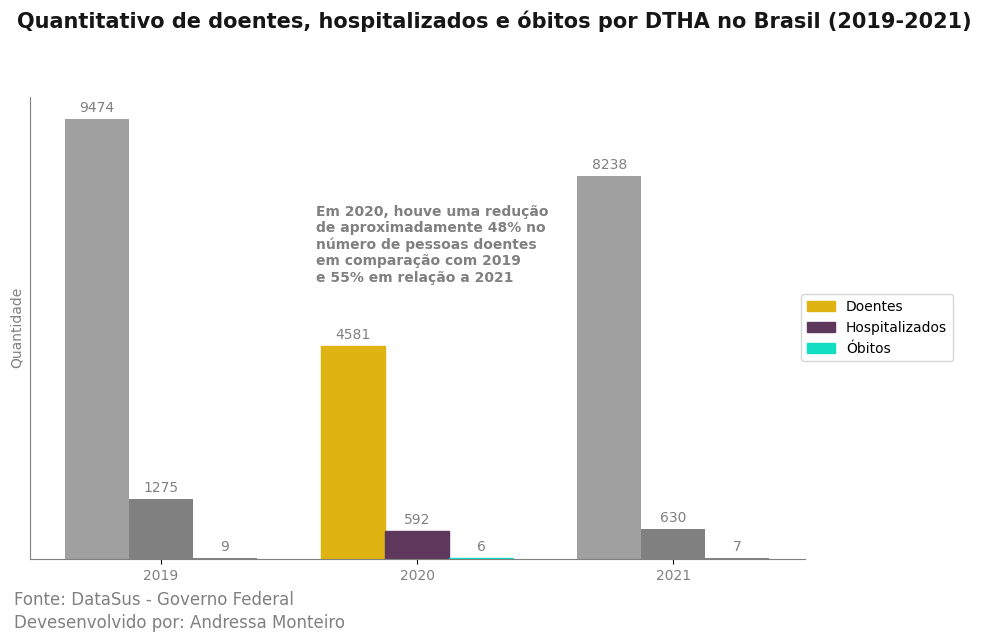

In [75]:
# Converta a coluna 'ano' para numérico
df['ano'] = pd.to_numeric(df['ano'])

# Agrupe os dados por 'ano' e some
df_grouped = df.groupby('ano').sum().reset_index()

# Definir as variáveis para o gráfico
anos = df_grouped['ano'].unique()
qt_doentes = df_grouped['qt_doentes']
qt_hospitalizados = df_grouped['qt_hosp']
qt_obitos = df_grouped['qt_obito']

x = np.arange(len(anos))  # as localizações dos rótulos no eixo x
width = 0.25  # a largura das barras

fig, ax = plt.subplots(figsize=(10, 6))

# Adicionar barras para cada atributo
rects1 = ax.bar(x - width, qt_doentes, width, label='Doentes', color='#a0a0a0')
rects2 = ax.bar(x, qt_hospitalizados, width, label='Hospitalizados', color='gray')
rects3 = ax.bar(x + width, qt_obitos, width, label='Óbitos', color='gray')

# Adicionar rótulos de valor nas barras
ax.bar_label(rects1, padding=3, color='gray')
ax.bar_label(rects2, padding=3, color='gray')
ax.bar_label(rects3, padding=3, color='gray')

# Modificar as cores das barras de 2020
index_2020 = np.where(anos == 2020)[0][0]
rects1[index_2020].set_color('#DEB312')
rects2[index_2020].set_color('#5E375D')
rects3[index_2020].set_color('#12DEC3')

# Adicionar rótulos, título e legendas
ax.set_ylabel('Quantidade', color='gray')
ax.text(0.6, 1.15, 'Quantitativo de doentes, hospitalizados e óbitos por DTHA no Brasil (2019-2021)',
        fontsize=15,
        color='#161616',
        fontweight='bold',
        ha='center',
        transform=ax.transAxes)

ax.set_xticks(x)
ax.set_xticklabels(anos, color='gray')

# Criar legendas personalizadas com cores
legend_labels = ['Doentes', 'Hospitalizados', 'Óbitos']
legend_handles = [Patch(color='#DEB312', label='Doentes'),
                  Patch(color='#5E375D', label='Hospitalizados'),
                  Patch(color='#12DEC3', label='Óbitos')]

# Adicionar a legenda personalizada ao eixo
ax.legend(handles=legend_handles, loc='center right', bbox_to_anchor=(1.2, 0.5))
ax.set_yticks([])
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')


ax.text(0.37, 0.60,'Em 2020, houve uma redução\n''de aproximadamente 48% no\n''número de pessoas doentes\n''em comparação com 2019\n''e 55% em relação a 2021',
        fontsize=10,
        fontweight='bold',
        color='gray',
        transform=ax.transAxes)
# Rodapé para a fonte
ax.text(-0.02, -0.10,'Fonte: DataSus - Governo Federal',
        fontsize=12,
        color="gray",
        transform=ax.transAxes)
ax.text(-0.02, -0.15,'Devesenvolvido por: Andressa Monteiro',
        fontsize=12,
        color="gray",
        transform=ax.transAxes)
ax.set_yticks([])

plt.show()

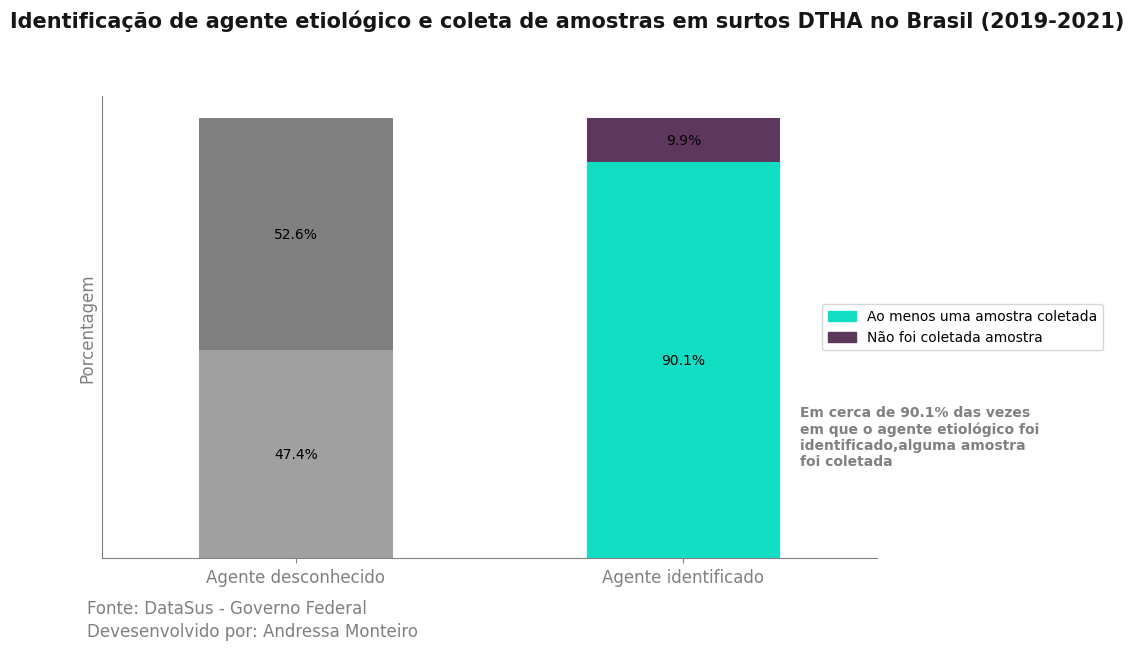

In [76]:
# Criar tabela de contingência usando a função crosstab do Pandas
contingency_table = pd.crosstab(df['ag_ident'], df['dic_amostra'])

# Calcular as porcentagens em relação ao total de cada categoria
percentage_table = contingency_table.div(contingency_table.sum(1), axis=0) * 100

# Criar uma figura para o gráfico de barras empilhadas com tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o gráfico de barras empilhadas com as cores especificadas
ax = percentage_table.plot(kind='bar', stacked=True, color=['#a0a0a0', 'gray'], ax=ax)

# Ajustar a cor da barra "Agente identificado" com a amostra coletada
ax.patches[3].set_facecolor('#5E375D')

# Ajustar a cor da barra "Agente identificado" com a amostra não coletada
ax.patches[1].set_facecolor('#12DEC3')

# Adicionar rótulos e título ao gráfico
ax.set_ylabel('Porcentagem',color='gray', fontsize=12)
ax.set_xlabel('')
ax.text(0.6, 1.15, 'Identificação de agente etiológico e coleta de amostras em surtos DTHA no Brasil (2019-2021)',
        fontsize=15,
        color='#161616',
        fontweight='bold',
        ha='center',
        transform=ax.transAxes)

# Adicionar legenda personalizada com cores
legend_labels = ['Ao menos uma amostra coletada', 'Não foi coletada amostra']
legend_handles = [Patch(color='#12DEC3', label='Ao menos uma amostra coletada'),
                  Patch(color='#5E375D', label='Não foi coletada amostra')]

# Adicionar a legenda personalizada ao eixo
ax.legend(handles=legend_handles, loc='center right', bbox_to_anchor=(1.3, 0.5))

# Adicionar rótulos com as porcentagens em cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Remover eixos e linhas desnecessárias
ax.set_yticks([])
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Ajustar a rotação dos rótulos no eixo x para 0 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#legenda
ax.text(0.9, 0.20,'Em cerca de 90.1% das vezes\n''em que o agente etiológico foi\n''identificado,alguma amostra\n''foi coletada',
        fontsize=10,
        fontweight='bold',
        color='gray',
        transform=ax.transAxes)

# Rodapé para a fonte
ax.text(-0.02, -0.12,'Fonte: DataSus - Governo Federal',
        fontsize=12,
        color="gray",
        transform=ax.transAxes)
ax.text(-0.02, -0.17,'Devesenvolvido por: Andressa Monteiro',
        fontsize=12,
        color="gray",
        transform=ax.transAxes)
ax.set_yticks([])
ax.tick_params(axis='x', colors='gray', labelsize=12)
# Mostrar o gráfico
plt.show()

In [77]:
percentage_table

dic_amostra,Foi coletada pelo menos uma amostra,Não foi coletada amostra
ag_ident,,
Agente desconhecido,47.405900,52.594100
Agente identificado,90.123457,9.876543


In [78]:
soma_doentes = df.groupby('genero_ag1')['qt_doentes'].sum()
soma_doentes.sort_values(ascending=False)

genero_ag1
Ignorado           15175
Escherichia         2024
Inconclusivo        1350
Salmonella           744
Rotavírus            719
Bacillus             534
Norovírus            404
Staphylococcus       336
Campylobacter        197
Clostridium          181
Trypanosoma          178
Coliformes           177
Klebsiella            61
Aeromonas             37
Shigella              37
Pseudomonas           29
Entamoeba             28
Urbanorum             13
Histamina             13
Adenovírus            12
Plesiomonas           10
Listeria               9
Enterobacter           9
Coxsackievirus         6
Enterovírus            5
Astrovírus             3
Toxoplasma             2
Cryptosporidium        0
Name: qt_doentes, dtype: int64

In [79]:
soma_hospitalizados=df.groupby('genero_ag1')['qt_hosp'].sum()
soma_hospitalizados.sort_values(ascending=False)

genero_ag1
Ignorado           1473
Inconclusivo        250
Salmonella          234
Escherichia         111
Bacillus            111
Staphylococcus       96
Coliformes           68
Norovírus            39
Trypanosoma          31
Rotavírus            31
Adenovírus           12
Clostridium          10
Listeria              9
Klebsiella            7
Cryptosporidium       5
Shigella              4
Aeromonas             3
Enterovírus           2
Entamoeba             1
Astrovírus            0
Toxoplasma            0
Campylobacter         0
Plesiomonas           0
Coxsackievirus        0
Pseudomonas           0
Enterobacter          0
Histamina             0
Urbanorum             0
Name: qt_hosp, dtype: int64

In [80]:
soma_obito=df.groupby('genero_ag1')['qt_obito'].sum()
soma_obito.sort_values(ascending=False)

genero_ag1
Ignorado           15
Listeria            4
Inconclusivo        1
Staphylococcus      1
Escherichia         1
Trypanosoma         0
Toxoplasma          0
Shigella            0
Salmonella          0
Rotavírus           0
Pseudomonas         0
Plesiomonas         0
Norovírus           0
Klebsiella          0
Adenovírus          0
Aeromonas           0
Histamina           0
Enterovírus         0
Enterobacter        0
Entamoeba           0
Cryptosporidium     0
Coxsackievirus      0
Coliformes          0
Clostridium         0
Campylobacter       0
Bacillus            0
Astrovírus          0
Urbanorum           0
Name: qt_obito, dtype: int64

<ipython-input-81-92bcb7584e90>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x='genero_ag1', y='qt_doentes', data=df_doentes, palette=cores_doentes)
<ipython-input-81-92bcb7584e90>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), color='gray')


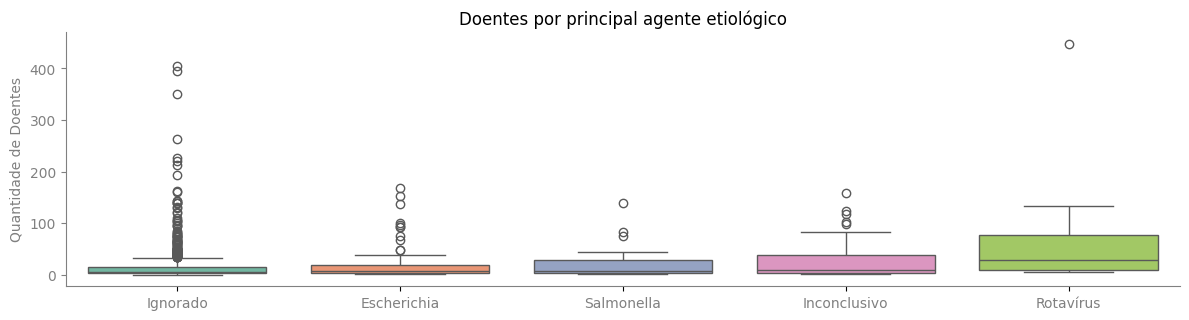

In [81]:
# Selecionando os cinco primeiros agentes causadores
age_doentes = ['Rotavírus', 'Salmonella', 'Escherichia', 'Inconclusivo', 'Ignorado']
df_doentes = df[df['genero_ag1'].isin(age_doentes)]

# Definir cores para cada agente
cores_doentes = sns.color_palette("Set2", n_colors=len(age_doentes))

# Criar um box plot
plt.figure(figsize=(12, 6))

# Definir cores para cada agente
cores_doentes = sns.color_palette("Set2", n_colors=len(age_doentes))

# Box plot para a coluna 'qt_doentes'
plt.subplot(2, 1, 1)
ax1 = sns.boxplot(x='genero_ag1', y='qt_doentes', data=df_doentes, palette=cores_doentes)
plt.title('Doentes por principal agente etiológico')
plt.xlabel('')
plt.ylabel('Quantidade de Doentes',color='gray')
plt.xticks(rotation=0)


# Configurações dos eixos
ax1.grid(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')

# Alterar a cor da escala do eixo y para cinza
ax1.yaxis.label.set_color('gray')
ax1.tick_params(axis='y', colors='gray')

# Alterar a cor dos nomes dos agentes para cinza
ax1.set_xticklabels(ax1.get_xticklabels(), color='gray')
# Ajustar o layout
plt.tight_layout()


# # Rodapé para a fonte
# ax1.text(-0.14, 0.12,'Fonte: DataSus - Governo Federal',
#         fontsize=12,
#         color="gray",
#         transform=ax.transAxes)
# # ax1.text(-0.14,0.07,'Devesenvolvido por: Andressa Monteiro',
# #         fontsize=12,
# #         color="gray",
# #         transform=ax.transAxes)

# # Mostrar o gráfico
plt.show()

In [82]:
df_doentes.groupby('genero_ag1')['qt_doentes'].describe()

,count,mean,std,min,25%,50%,75%,max
genero_ag1,,,,,,,,
Escherichia,109.0,18.568807,30.416055,2.0,4.0,7.0,18.00,169.0
Ignorado,936.0,16.212607,33.598553,0.0,3.0,6.0,15.00,404.0
Inconclusivo,47.0,28.723404,37.596659,2.0,3.0,10.0,37.50,159.0
Rotavírus,8.0,89.875000,151.109646,6.0,9.0,28.0,77.75,448.0
Salmonella,36.0,20.666667,28.772010,2.0,3.0,8.0,28.00,139.0


<ipython-input-83-f8c162168030>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='genero_ag1', y='qt_hosp', data=df_hosp, palette=cores_hosp)
<ipython-input-83-f8c162168030>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), color='gray')


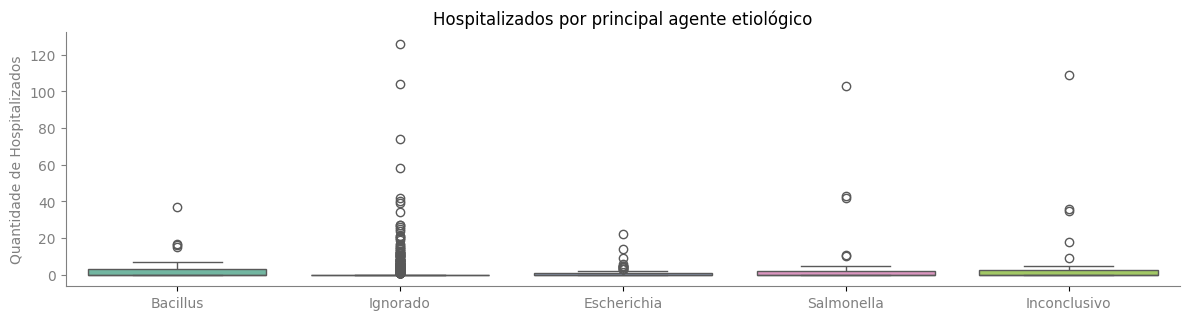

In [83]:
age_hosp = ['Bacillus', 'Salmonella', 'Escherichia', 'Inconclusivo', 'Ignorado']
df_hosp = df[df['genero_ag1'].isin(age_hosp)]
cores_hosp = sns.color_palette("Set2", n_colors=len(age_hosp))
plt.figure(figsize=(12, 6))

# Box plot para a coluna 'qt_hosp'
plt.subplot(2, 1, 2)
ax2 = sns.boxplot(x='genero_ag1', y='qt_hosp', data=df_hosp, palette=cores_hosp)
plt.title('Hospitalizados por principal agente etiológico')
plt.xlabel('')
plt.ylabel('Quantidade de Hospitalizados',color= 'gray')
plt.xticks(rotation=0)

# Configurações dos eixos
ax2.grid(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_color('gray')
ax2.spines['left'].set_color('gray')

# Alterar a cor da escala do eixo y para cinza
ax2.yaxis.label.set_color('gray')
ax2.tick_params(axis='y', colors='gray')

# Alterar a cor dos nomes dos agentes para cinza
ax2.set_xticklabels(ax2.get_xticklabels(), color='gray')
# Ajustar o layout
plt.tight_layout()
# Mostrar o gráfico
plt.show()

In [84]:
df_hosp.groupby('genero_ag1')['qt_hosp'].describe()

,count,mean,std,min,25%,50%,75%,max
genero_ag1,,,,,,,,
Bacillus,26.0,4.269231,8.450125,0.0,0.0,0.0,3.0,37.0
Escherichia,109.0,1.018349,2.844689,0.0,0.0,0.0,1.0,22.0
Ignorado,936.0,1.573718,7.306939,0.0,0.0,0.0,0.0,126.0
Inconclusivo,47.0,5.319149,17.214890,0.0,0.0,0.0,2.5,109.0
Salmonella,36.0,6.500000,19.264327,0.0,0.0,0.0,2.0,103.0


In [85]:
alimento_doentes = df.groupby('alimento_causador')['qt_doentes'].sum()
alimento_doentes.sort_values(ascending=False)

alimento_causador
Ignorado                                            13227
Água                                                 2473
Múltiplos alimentos                                  1570
Alimentos mistos                                     1335
Doces e sobremesas                                   1115
Carne bovina in natura, processados e miúdos          512
Leite e derivados                                     351
Carne de ave in natura, processados e miúdos          348
Ovos e produtos à base de ovos                        306
Frutas, produtos de frutas e similares                236
Hortaliças                                            214
Pescados, frutos do mar e processados                 205
Cereais, farináceos e produtos à base de cereais      133
Gelados comestíveis                                   104
Carne suína in natura, processados e miúdos            87
Produtos cárneos embutidos, obtidos de emulsão         55
Inconsistente                                         

<ipython-input-86-36b5ed5f690c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='alimento_causador', y='qt_doentes', data=df_aldoentes, palette=cores_aldoentes)
<ipython-input-86-36b5ed5f690c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), color='gray')


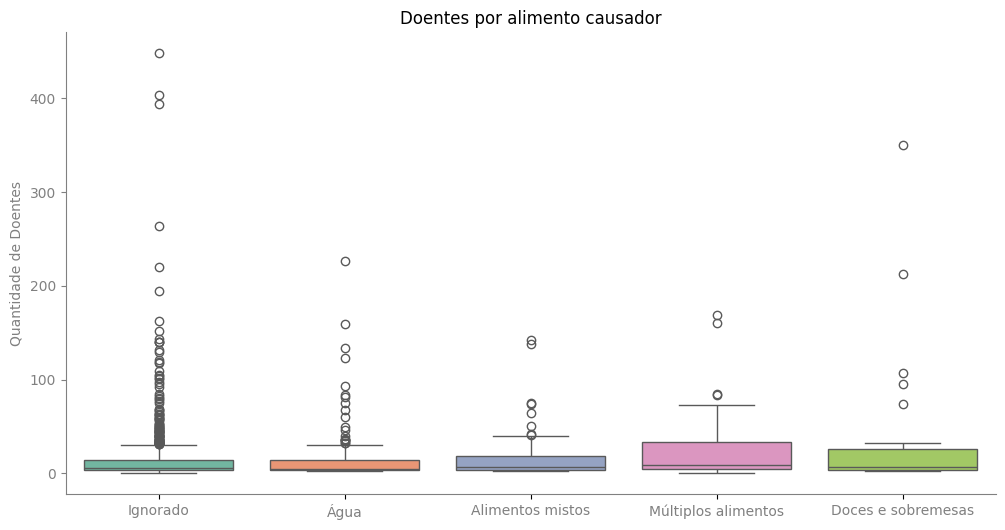

In [86]:
doente_ali_causador = ['Água', 'Múltiplos alimentos', 'Alimentos mistos', 'Doces e sobremesas', 'Ignorado']
df_aldoentes = df[df['alimento_causador'].isin(doente_ali_causador)]
cores_aldoentes= sns.color_palette("Set2", n_colors=len(doente_ali_causador))
plt.figure(figsize=(12, 6))

# Box plot para a coluna 'qt_hosp'
ax = sns.boxplot(x='alimento_causador', y='qt_doentes', data=df_aldoentes, palette=cores_aldoentes)
plt.title('Doentes por alimento causador')
plt.xlabel('')
plt.ylabel('Quantidade de Doentes',color= 'gray')
plt.xticks(rotation=0)

# Configurações dos eixos
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Alterar a cor da escala do eixo y para cinza
ax.yaxis.label.set_color('gray')
ax.tick_params(axis='y', colors='gray')

# Alterar a cor dos nomes dos agentes para cinza
ax.set_xticklabels(ax.get_xticklabels(), color='gray')
# # Ajustar o layout
# plt.tight_layout()
# Mostrar o gráfico
plt.show()

In [87]:
df_aldoentes.groupby('alimento_causador')['qt_doentes'].describe()

,count,mean,std,min,25%,50%,75%,max
alimento_causador,,,,,,,,
Alimentos mistos,78.0,17.115385,25.797906,2.0,3.25,7.0,18.0,142.0
Doces e sobremesas,32.0,34.843750,71.914873,2.0,4.00,7.0,26.0,350.0
Ignorado,822.0,16.091241,34.868155,0.0,3.00,6.0,14.0,448.0
Múltiplos alimentos,69.0,22.753623,31.851404,0.0,5.00,9.0,33.0,169.0
Água,168.0,14.720238,28.472684,2.0,3.00,5.0,14.0,226.0


In [88]:
alimento_hosp = df.groupby('alimento_causador')['qt_hosp'].sum()
alimento_hosp.sort_values(ascending=False)

alimento_causador
Ignorado                                            1262
Alimentos mistos                                     272
Água                                                 271
Múltiplos alimentos                                  227
Ovos e produtos à base de ovos                       145
Leite e derivados                                    133
Hortaliças                                            73
Doces e sobremesas                                    37
Carne bovina in natura, processados e miúdos          23
Carne de ave in natura, processados e miúdos          18
Frutas, produtos de frutas e similares                10
Bebidas não alcoólicas                                 9
Pescados, frutos do mar e processados                  9
Carne suína in natura, processados e miúdos            5
Cereais, farináceos e produtos à base de cereais       2
Gelados comestíveis                                    1
Inconsistente                                          0
Produtos cárn

<ipython-input-89-2157d16ea7ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='alimento_causador', y='qt_hosp', data=df_alhosp, palette=cores_alhosp)
<ipython-input-89-2157d16ea7ea>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), color='gray')


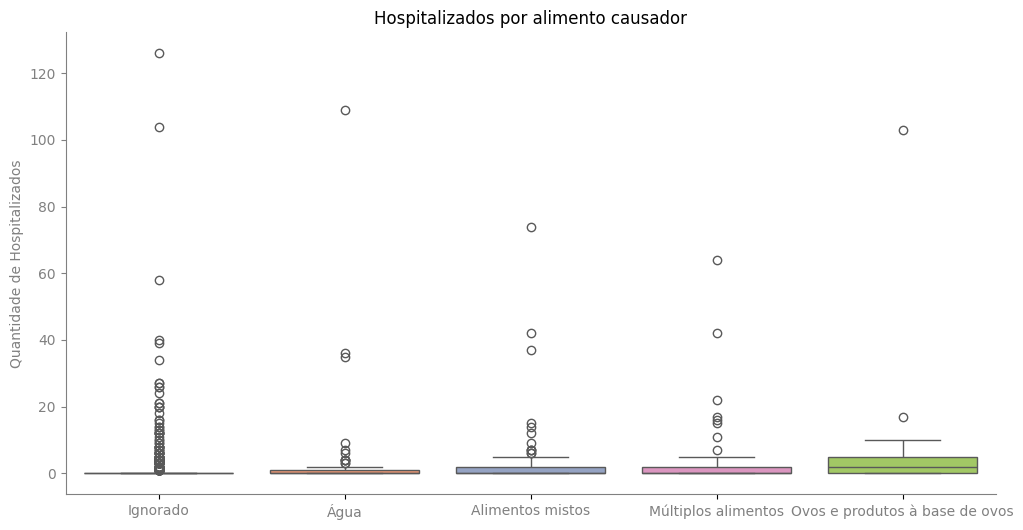

In [89]:
ali_hosp = ['Água', 'Múltiplos alimentos', 'Alimentos mistos', 'Ovos e produtos à base de ovos', 'Ignorado']
df_alhosp = df[df['alimento_causador'].isin(ali_hosp)]
cores_alhosp= sns.color_palette("Set2", n_colors=len(ali_hosp))
plt.figure(figsize=(12, 6))

# Box plot para a coluna 'qt_hosp'
ax = sns.boxplot(x='alimento_causador', y='qt_hosp', data=df_alhosp, palette=cores_alhosp)
plt.title('Hospitalizados por alimento causador')
plt.xlabel('')
plt.ylabel('Quantidade de Hospitalizados',color= 'gray')
plt.xticks(rotation=0)

# Configurações dos eixos
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Alterar a cor da escala do eixo y para cinza
ax.yaxis.label.set_color('gray')
ax.tick_params(axis='y', colors='gray')

# Alterar a cor dos nomes dos agentes para cinza
ax.set_xticklabels(ax.get_xticklabels(), color='gray')

# Mostrar o gráfico
plt.show()

In [90]:
df_alhosp.groupby('alimento_causador')['qt_hosp'].describe()

,count,mean,std,min,25%,50%,75%,max
alimento_causador,,,,,,,,
Alimentos mistos,78.0,3.487179,10.602308,0.0,0.0,0.0,2.00,74.0
Ignorado,822.0,1.535280,7.192878,0.0,0.0,0.0,0.00,126.0
Múltiplos alimentos,69.0,3.289855,9.890729,0.0,0.0,0.0,2.00,64.0
Ovos e produtos à base de ovos,14.0,10.357143,27.102674,0.0,0.0,2.0,4.75,103.0
Água,168.0,1.613095,9.248354,0.0,0.0,0.0,1.00,109.0
